In [2]:
from pandas import read_csv, DataFrame
import pandas as pd

In [3]:
%run 'scripts/dslabs_functions.py'


In [4]:
#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/non_supervised_analysis/notebooks/dataset_2/df_bakery_pre_proc.csv'

file_tag = 'Bakery'

data = pd.read_csv(filepath)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

# Dimensionality

In [6]:
from matplotlib.pyplot import figure, savefig, show


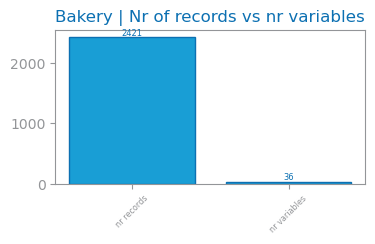

In [7]:
figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
savefig(f"images/{file_tag}_records_variables.png") #save for later step
show()

## Missing values


Variables with their respective percentages of missing values:
croque monsieur: 100.00%
mad garlic: 100.00%
tiramisu: 99.71%
lemon ade: 98.55%
merinque cookies: 98.06%
berry ade: 97.77%
cheese cake: 96.28%
milk tea: 94.34%
caffe latte: 92.03%
gateau chocolat: 91.90%
almond croissant: 91.66%
vanila latte: 91.37%
jam: 90.91%
cacao deep: 86.66%
pandoro: 85.83%
wiener: 85.34%
americano: 82.98%
orange pound: 78.56%
pain au chocolat: 75.75%
croissant: 69.14%
tiramisu croissant: 67.82%
plain bread: 64.60%
angbutter: 18.50%
place: 10.53%
day of week: 0.04%
total: 0.04%


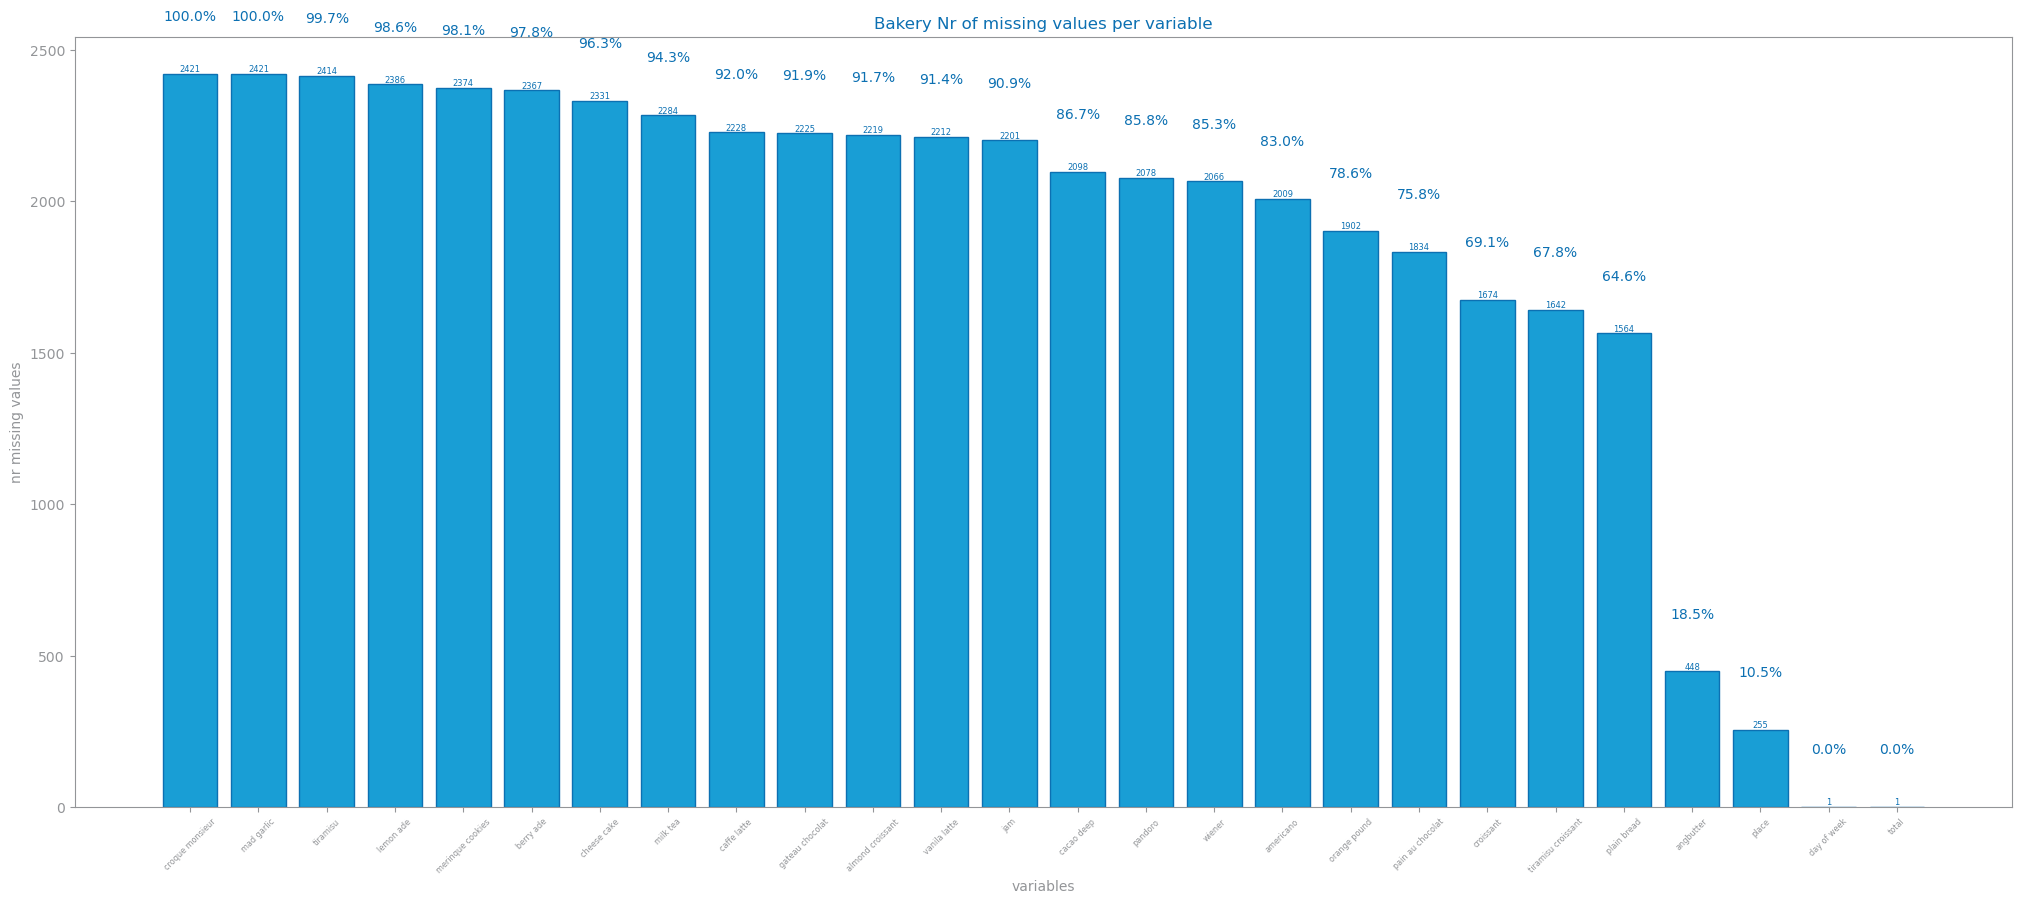

In [8]:
mv: dict[str, int] = {}
total_rows = len(data)

# Calculate the number of missing values and percentage for each variable
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

# Sort the dictionary by the number of missing values in descending order
sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

# Print the list of variables with their respective percentages of missing values
print("Variables with their respective percentages of missing values:")
for var, perc in zip(variables, percentages):
    print(f"{var}: {perc:.2f}%")

# Plotting the bar chart
figure(figsize=(25, 10))  # (width, height)

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} | Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)

# Annotate the bars with percentages
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

# Display the chart
show()

## Variables types

In [9]:
data.dtypes

datetime               object
day of week            object
total                 float64
place                  object
angbutter             float64
plain bread           float64
jam                   float64
americano             float64
croissant             float64
caffe latte           float64
tiramisu croissant    float64
cacao deep            float64
pain au chocolat      float64
almond croissant      float64
croque monsieur       float64
mad garlic            float64
milk tea              float64
gateau chocolat       float64
pandoro               float64
cheese cake           float64
lemon ade             float64
orange pound          float64
wiener                float64
vanila latte          float64
berry ade             float64
tiramisu              float64
merinque cookies      float64
day_of_year             int64
week_of_month           int64
is_weekend               bool
day_of_week_nr          int64
day_of_month            int64
month                  object
hour      

In [10]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

{'numeric': ['total', 'angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur', 'mad garlic', 'milk tea', 'pandoro', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'tiramisu', 'day_of_year', 'week_of_month', 'day_of_week_nr', 'day_of_month', 'hour', 'min'], 'binary': ['gateau chocolat', 'cheese cake', 'berry ade', 'merinque cookies', 'is_weekend'], 'date': ['datetime'], 'symbolic': ['day of week', 'place', 'month', 'time_of_day']}


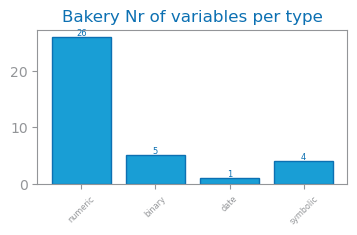

In [11]:
variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} Nr of variables per type"
)
savefig(f"./{file_tag}_variable_types.png") 
show()

In [12]:
# Calculate the number of distinct values for each column
distinct_counts = {var_type: {col: data[col].nunique() for col in cols} for var_type, cols in variable_types.items()}

# Print the results
for var_type, counts in distinct_counts.items():
    print(f"{var_type.capitalize()} Variables:")
    for col, count in counts.items():
        print(f"  {col}: {count} distinct values")
    print()

Numeric Variables:
  total: 257 distinct values
  angbutter: 11 distinct values
  plain bread: 5 distinct values
  jam: 4 distinct values
  americano: 5 distinct values
  croissant: 7 distinct values
  caffe latte: 3 distinct values
  tiramisu croissant: 9 distinct values
  cacao deep: 4 distinct values
  pain au chocolat: 6 distinct values
  almond croissant: 4 distinct values
  croque monsieur: 0 distinct values
  mad garlic: 0 distinct values
  milk tea: 4 distinct values
  pandoro: 5 distinct values
  lemon ade: 3 distinct values
  orange pound: 3 distinct values
  wiener: 5 distinct values
  vanila latte: 4 distinct values
  tiramisu: 1 distinct values
  day_of_year: 250 distinct values
  week_of_month: 5 distinct values
  day_of_week_nr: 7 distinct values
  day_of_month: 31 distinct values
  hour: 9 distinct values
  min: 60 distinct values

Binary Variables:
  gateau chocolat: 2 distinct values
  cheese cake: 2 distinct values
  berry ade: 2 distinct values
  merinque cookies: 2

# Distribution


In [13]:
summary5: DataFrame = data.describe(include="all")
summary5

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,merinque cookies,day_of_year,week_of_month,is_weekend,day_of_week_nr,day_of_month,month,hour,min,time_of_day
count,2421,2420,2.420000e+03,2166,1973.000000,857.000000,220.000000,412.000000,747.000000,193.000000,...,47.000000,2421.000000,2421.000000,2421,2421.000000,2421.000000,2421,2421.000000,2421.000000,2421
unique,NaN,7,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,12,NaN,NaN,4
top,NaN,Sun,NaN,동면,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,March,NaN,NaN,Afternoon
freq,NaN,554,NaN,416,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1414,NaN,NaN,314,NaN,NaN,1686
mean,2019-12-11 16:31:45.997521664,NaN,2.117252e+04,NaN,1.636594,1.199533,1.131818,1.245146,1.404284,1.108808,...,1.042553,180.807105,2.713755,NaN,3.637753,15.743907,NaN,12.719124,26.983478,NaN
min,2019-07-11 15:35:00,NaN,1.280000e+04,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,NaN,0.000000,1.000000,NaN,11.000000,0.000000,NaN
25%,2019-09-22 13:01:00,NaN,1.580000e+04,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,67.000000,2.000000,NaN,2.000000,8.000000,NaN,11.000000,12.000000,NaN
50%,2019-12-15 12:14:00,NaN,1.850000e+04,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,210.000000,3.000000,NaN,4.000000,16.000000,NaN,12.000000,25.000000,NaN
75%,2020-02-26 16:13:00,NaN,2.300000e+04,NaN,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,285.000000,4.000000,NaN,5.000000,23.000000,NaN,14.000000,42.000000,NaN
max,2020-06-18 14:52:00,NaN,1.293000e+06,NaN,11.000000,5.000000,5.000000,5.000000,16.000000,3.000000,...,2.000000,364.000000,5.000000,NaN,6.000000,31.000000,NaN,23.000000,59.000000,NaN


In [14]:
#Use a variable from the dataset - Note: i dont have numeric variables in my dataset 
var: str = "total"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for total variable:
	Count:  2420.0
	Mean:  21172.520661157025
	StDev:  26997.269797687644
	Min:  12800.0
	Q1:  15800.0
	Median:  18500.0
	Q3:  23000.0
	Max:  1293000.0


In [15]:
var = "place"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])

Summary for place variable:
	Count:  2166
	Unique:  19
	Top:  동면
	Freq:  416


## Numeric variables


In [16]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
#from dslabs_functions import define_grid, HEIGHT

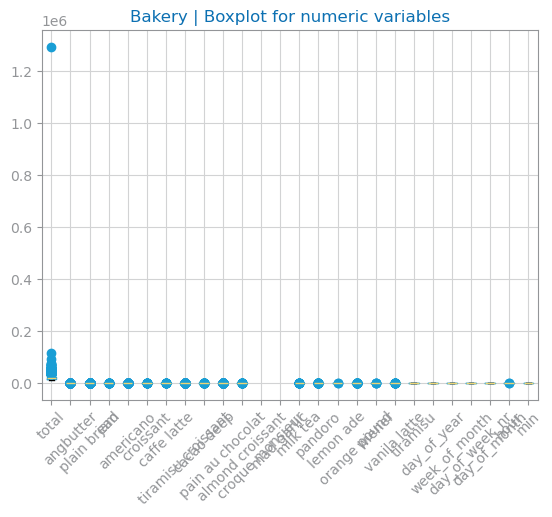

In [17]:
from matplotlib.pyplot import savefig, show, title
#from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    data[numeric].boxplot(rot=45)
    title(f'{file_tag} | Boxplot for numeric variables')  # Correct way to set title
    savefig(f"./{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

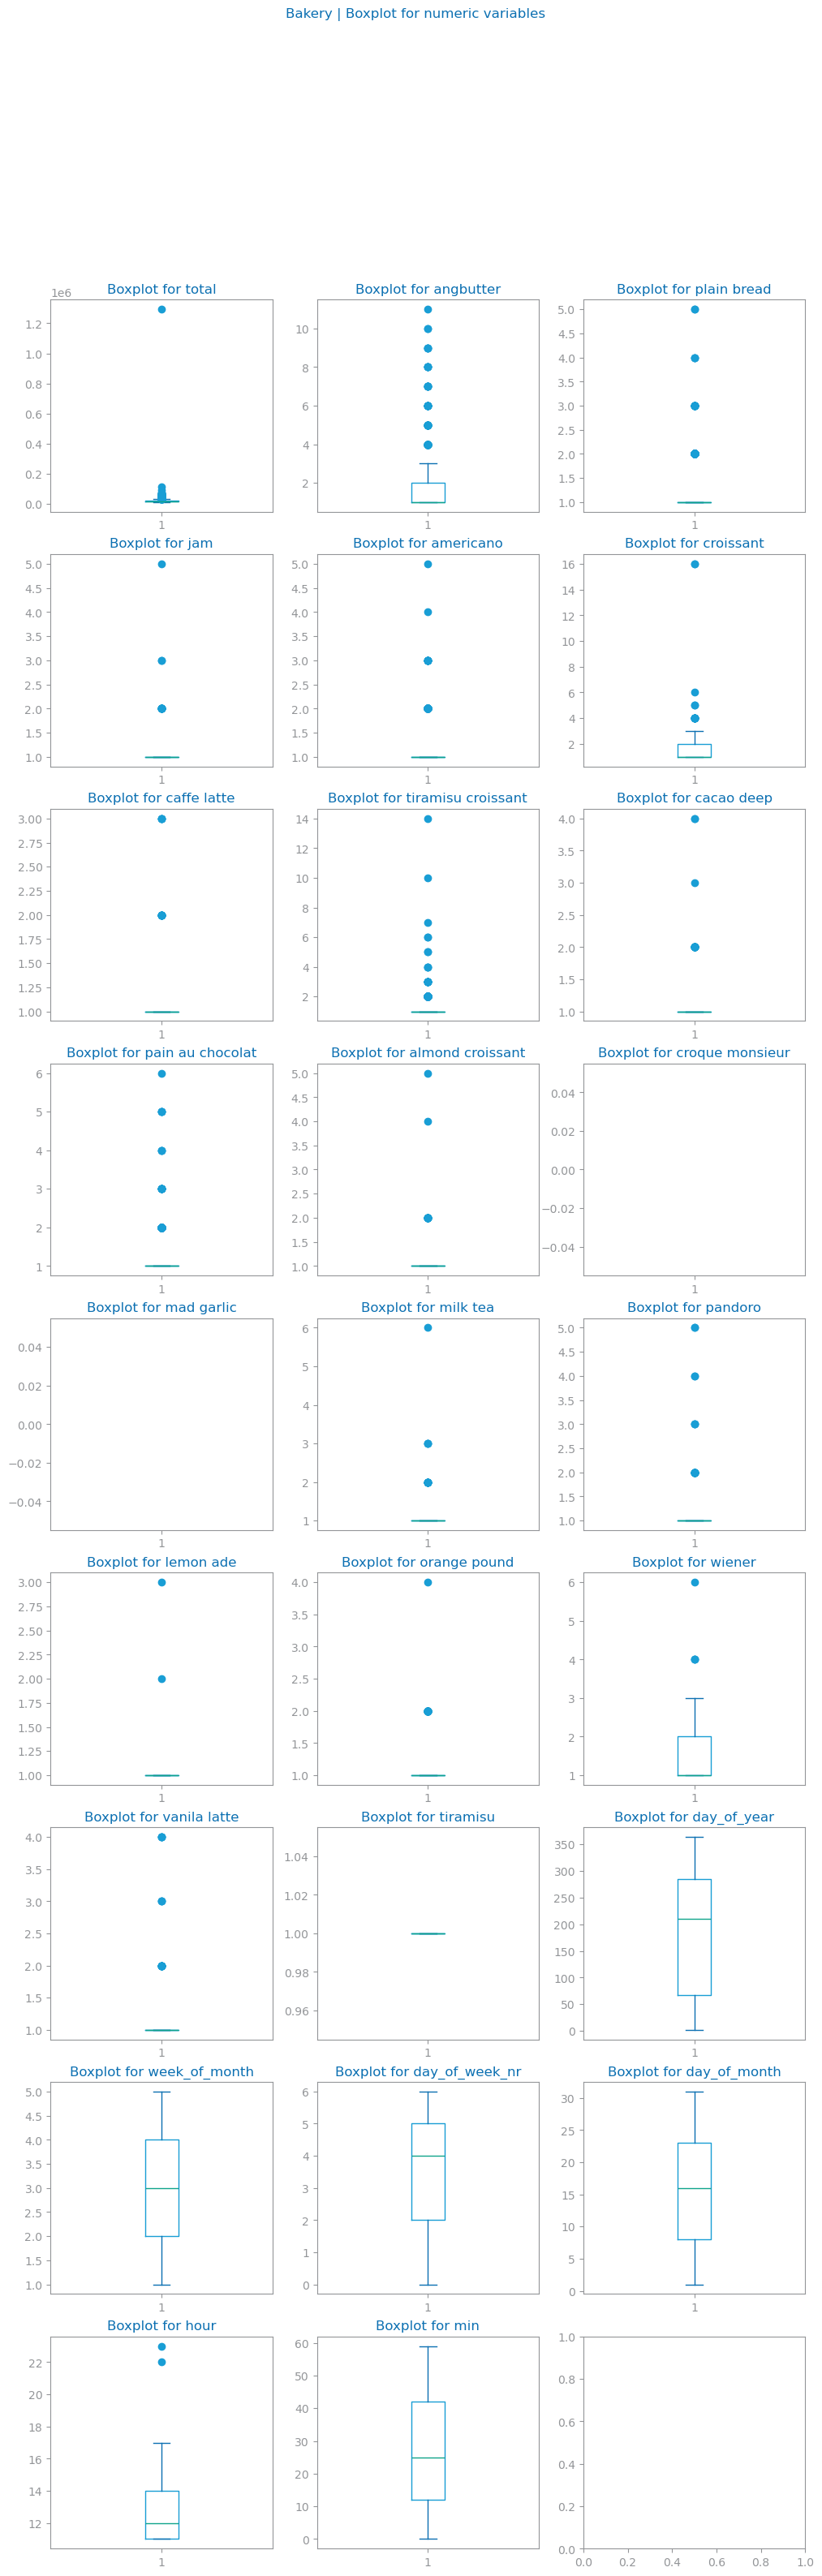

In [18]:
numeric: list[str] = variable_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

## Outliers
Standard Deviation Method (stdev):

A higher number of outliers detected by this method might suggest that the data points are far from the mean, indicating possible anomalies or extreme values
works well on normally distrib data

IQR:

less sensitive to skewed data and works well with data that is not normally distributed because it relies on the spread of the middle 50% of the data
A higher number of outliers detected by this method indicates that there are extreme values relative to the majority of data points. The IQR method is robust and less influenced by extreme values in the dataset

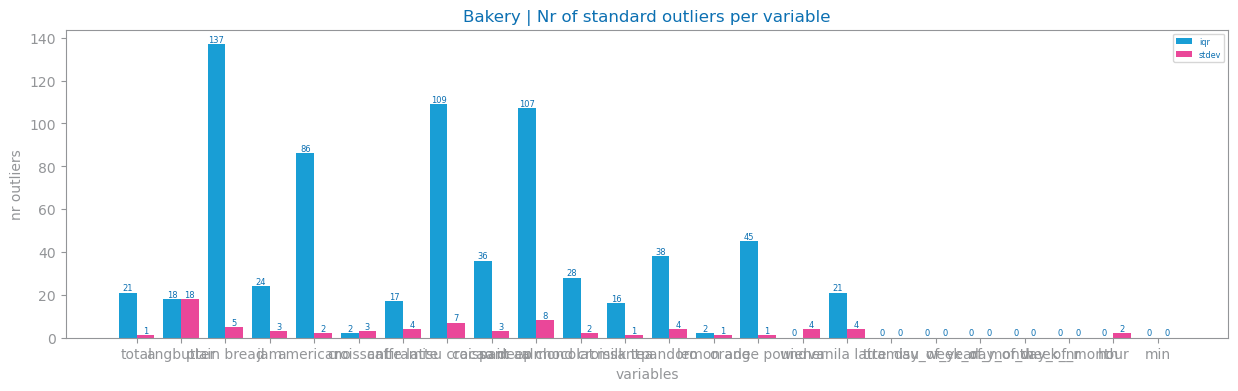

In [19]:
import numpy as np
from pandas import Series, DataFrame
from matplotlib.pyplot import figure, savefig, show
#from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 2
IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    
    if std_based:
        # Check for NaN or NaT before doing the calculation
        if pd.isna(summary5["mean"]) or pd.isna(summary5["std"]):
            return np.nan, np.nan
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        if pd.isna(summary5["75%"]) or pd.isna(summary5["25%"]):
            return np.nan, np.nan
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    valid_numeric: list = []  # This will store only the variables with valid outlier counts
    summary5: DataFrame = data[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        
        # Check if we can compute std-based outliers
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        if not pd.isna(top) and not pd.isna(bottom):
            outliers_stdev_count = (
                data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
            )
            outliers_stdev.append(outliers_stdev_count)

            # Check if we can compute IQR-based outliers
            top, bottom = determine_outlier_thresholds_for_var(
                summary5[var], std_based=False, threshold=iqrfactor
            )
            if not pd.isna(top) and not pd.isna(bottom):
                outliers_iqr_count = (
                    data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
                )
                outliers_iqr.append(outliers_iqr_count)
                valid_numeric.append(var)  # Add to valid list if both checks pass

    return {"iqr": outliers_iqr, "stdev": outliers_stdev, "valid_numeric": valid_numeric}


if numeric:
    outliers: dict[str, int] = count_outliers(data, numeric, nrstdev=4, iqrfactor=4.5)
    
    # Use only the valid variables for which we have calculated outliers
    valid_numeric = outliers["valid_numeric"]
    
    figure(figsize=(15, HEIGHT))
    plot_multibar_chart(
        valid_numeric,  # Use only valid numeric columns
        {"iqr": outliers["iqr"], "stdev": outliers["stdev"]},  # Use valid outliers
        title=f"{file_tag} | Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"./{file_tag}_outliers.png")
    show()
else:
    print("There are no numeric variables.")

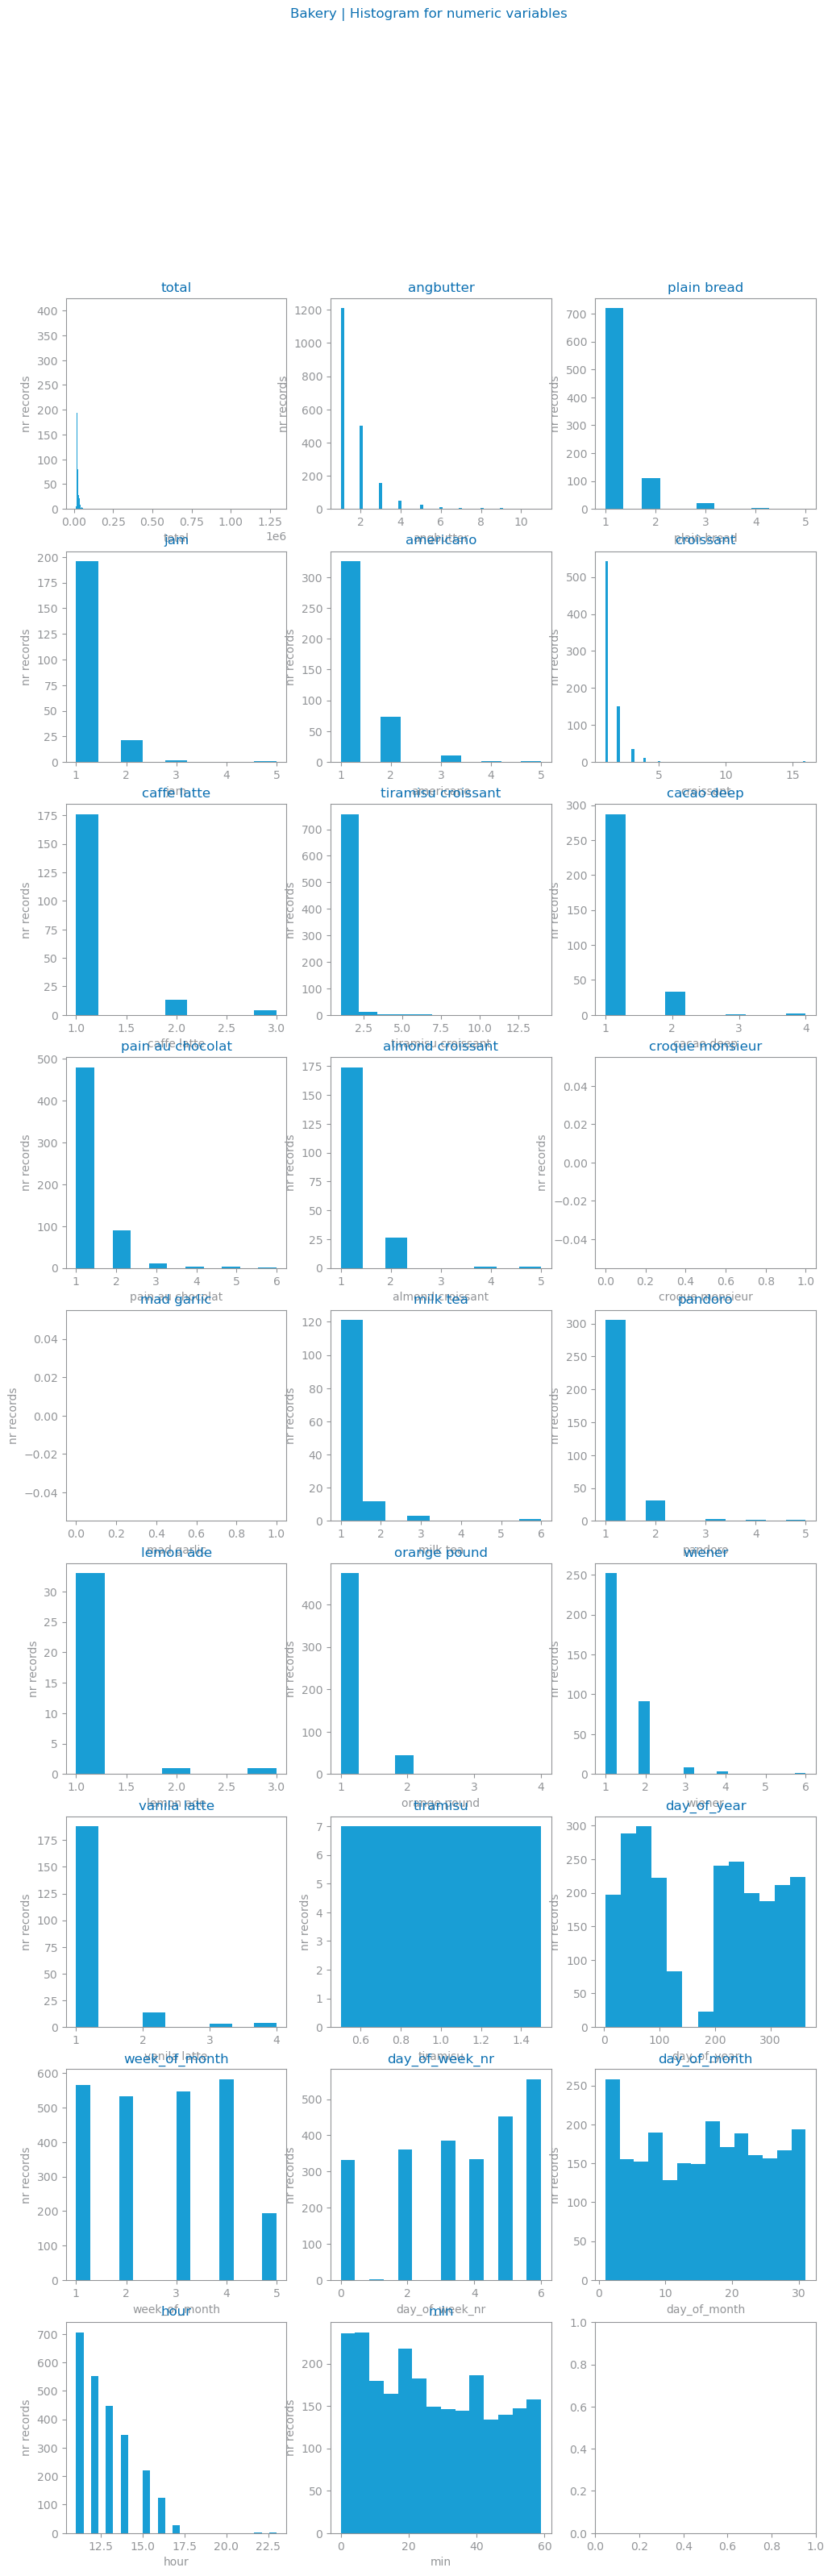

In [20]:
#from dslabs_functions import set_chart_labels


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Histogram for numeric variables')
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"{numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(data[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"./{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

No data available for croque monsieur
No data available for mad garlic


ZeroDivisionError: float division by zero

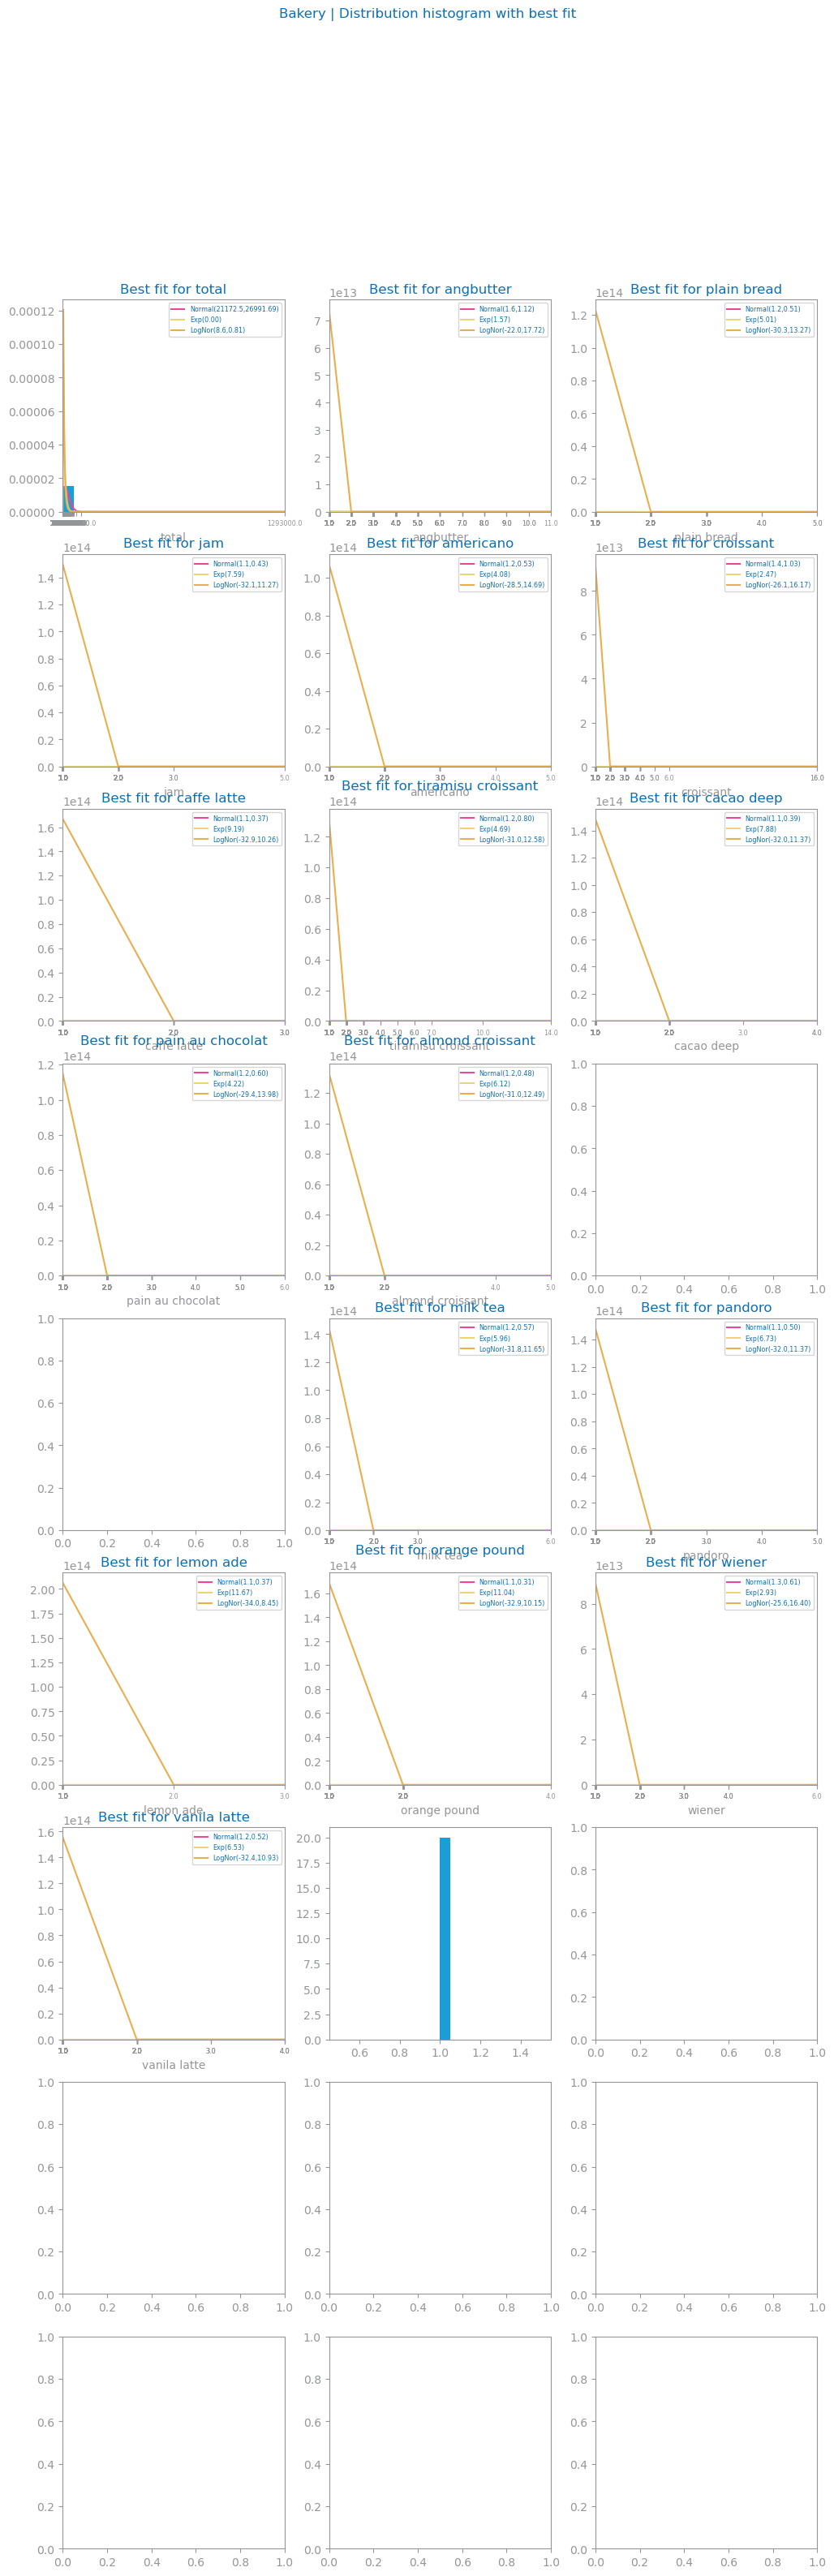

In [21]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
#from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    if len(x_values) > 0:  # Check for empty list
        # Gaussian
        mean, sigma = norm.fit(x_values)
        distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
        # Exponential
        loc, scale = expon.fit(x_values)
        distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
        # LogNorm
        sigma, loc, scale = lognorm.fit(x_values)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    if len(values) > 0:  # Check for empty values list
        ax.hist(values, 20, density=True)
        distributions: dict = compute_known_distributions(values)
        plot_multiline_chart(
            values,
            distributions,
            ax=ax,
            title="Best fit for %s" % var,
            xlabel=var,
            ylabel="",
        )
    else:
        print(f"No data available for {var}")


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Distribution histogram with best fit')
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], data[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

## Symbolic Variables


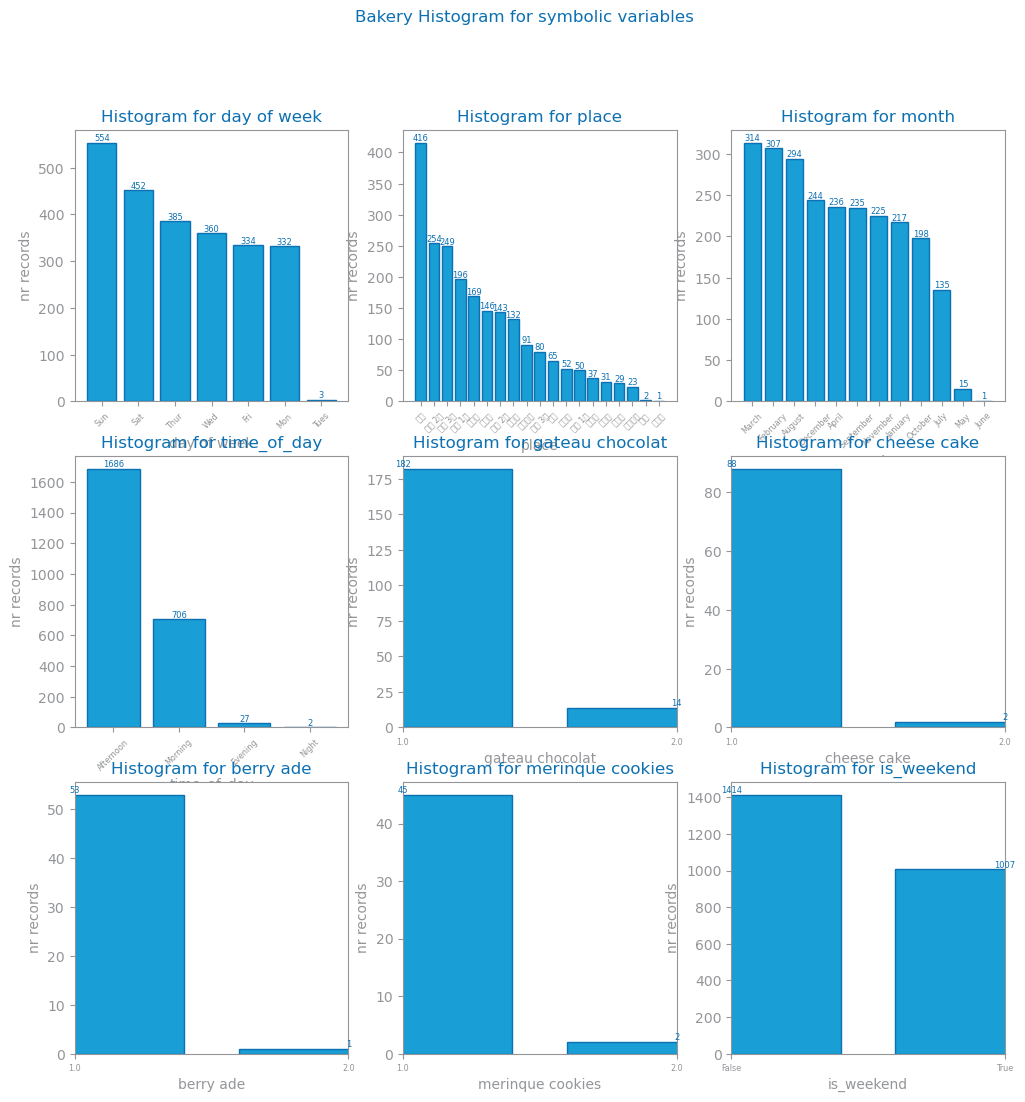

In [22]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
#from dslabs_functions import define_grid, HEIGHT



symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} Histogram for symbolic variables')
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title=f"Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

# Granularity

## Dates

In [23]:
from pandas import DataFrame
#ver para weekend, dia da semana (mon, tue, thu), hora, minuto. estudar a granularidade destas variaveis.
#variáveis ciclicas.

def derive_date_variables(data: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        data[date + "_year"] = data[date].dt.year
        data[date + "_quarter"] = data[date].dt.quarter
        data[date + "_month"] = data[date].dt.month
        data[date + "_day"] = data[date].dt.day
    return data

In [24]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

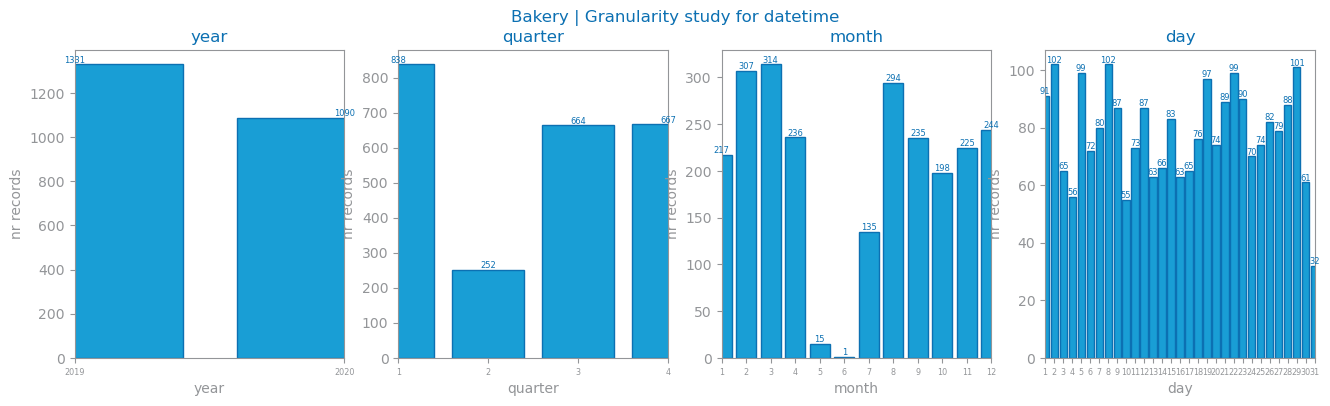

In [25]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
#from dslabs_functions import plot_bar_chart, HEIGHT
#get_variable_types

def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} | Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs


data: DataFrame = read_csv(
    filepath, index_col=None, parse_dates=True, dayfirst=True
)
variables_types: dict[str, list] = get_variable_types(data)
data_ext: DataFrame = derive_date_variables(data, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(data, v_date, ["year", "quarter", "month", "day"])
    savefig(f"./{file_tag}_granularity_{v_date}.png")
    show()

# Sparsity
Note: scatter function is not able to deal with MV in non-numeric variables, and so we need to drop any of records having them (using the dropna method)

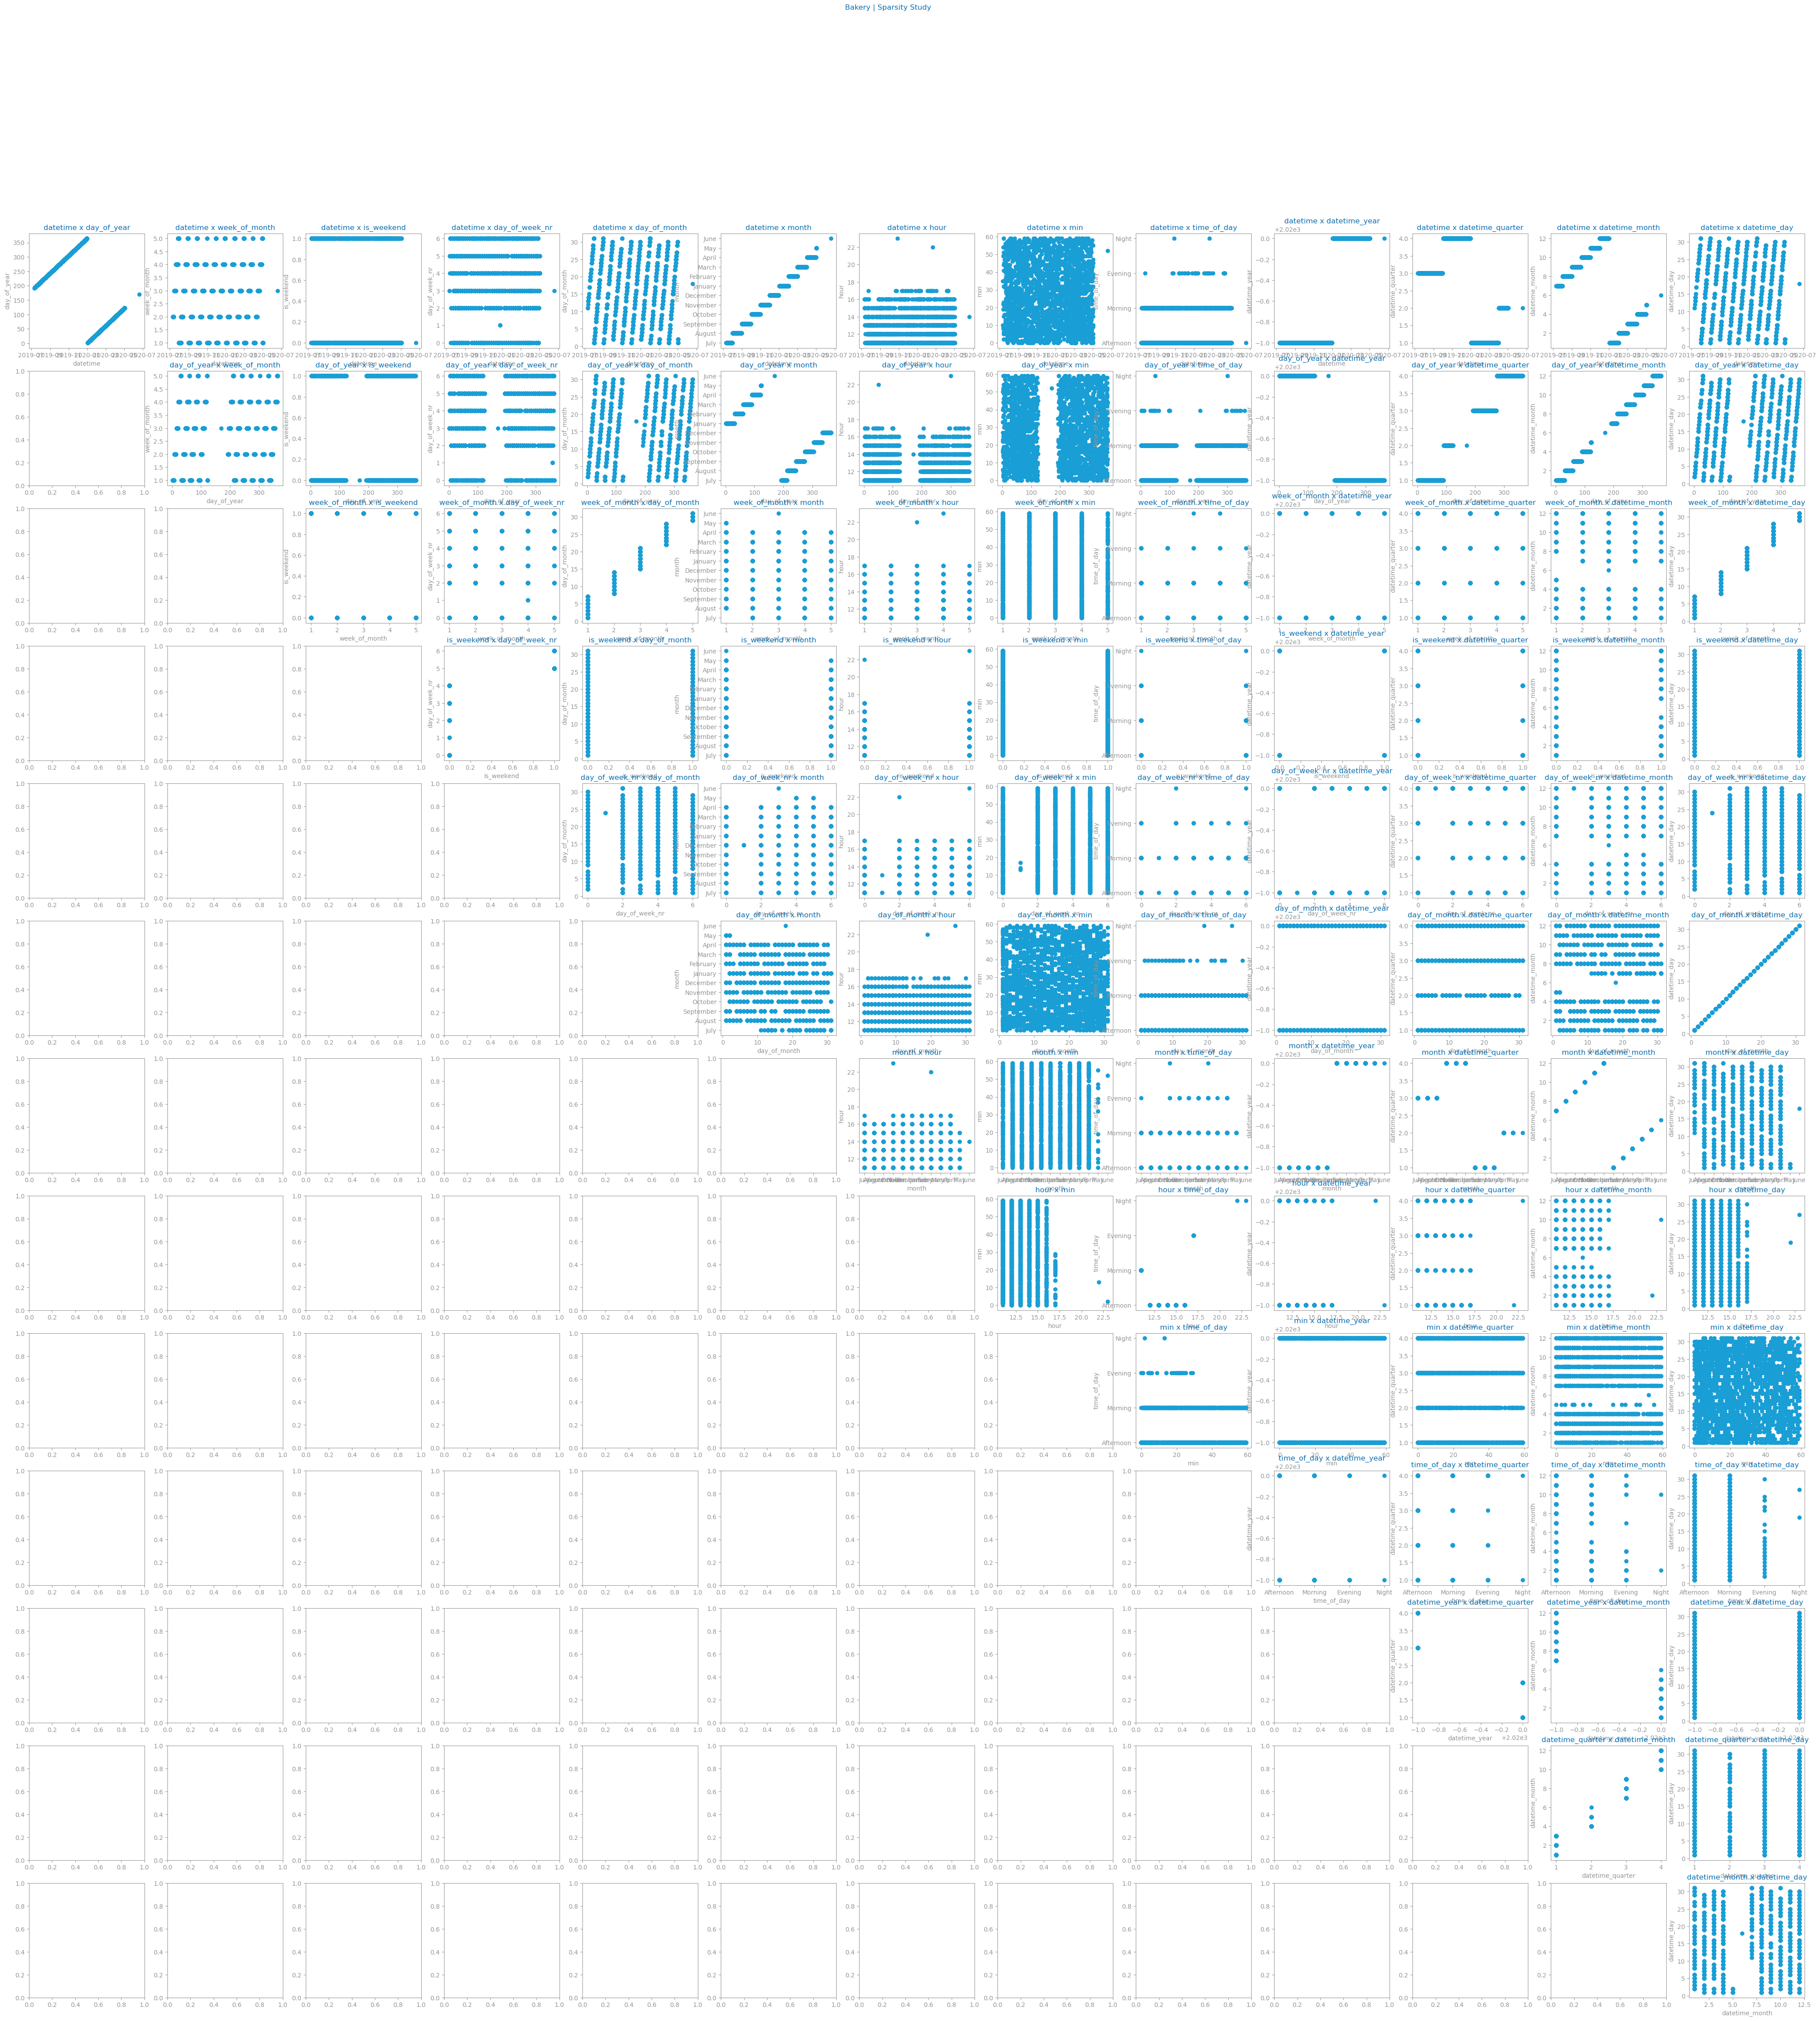

In [26]:
# Drop rows with NaN values
sampled_data = data.dropna(axis=1) #correr com axis=0 p retirar os records e nao as variaveis

# Check if data is empty after dropping NaNs
if sampled_data.empty:
    print("No data available after dropping NaN values.")
else:
    vars: list = sampled_data.columns.to_list()  # Ensure you're using data's columns

    if vars:  # Check if vars is not empty
        n: int = len(vars) - 1
        fig: Figure
        axs: ndarray
        fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)

        fig.suptitle(f'{file_tag} | Sparsity Study')


        for i in range(len(vars)):
            var1: str = vars[i]
            for j in range(i + 1, len(vars)):
                var2: str = vars[j]
                plot_multi_scatters_chart(sampled_data, var1, var2, ax=axs[i, j - 1])
        
        # Save the figure if needed
        savefig(f"./{file_tag}_sparsity_study.png")
        show()
    else:
        print("Sparsity class: there are no variables.")